# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar data cleaning and preparation as we did in the FTE. Specifically, at least complete these minimum requirements:

- Check for outliers in numeric data, and deal with them if needed
- Check for missing values, and decide how to deal with them if needed
- Convert categorical columns to numeric values
- Create at least one new feature by combining multiple columns. For example, you could calculate the ratio of total charges to tenure. Create at least one plot for your new feature.
- Save the data to a csv (or another filetype of your choice) for use next week.
- Write a short analysis at the end of the notebook describing your findings and what you did.

You can do more data cleaning, preparation, and EDA beyond these basic requirements if you want to learn more and develop your data science skills. For example, you could use a box-cox transformation on the numeric data or try other outlier methods.

### DS process status

Here is our data science process, and where we are (#3):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Done in week 1 (mostly), this is iterative so you might do more of this as we go on.

**3. Data preparation**

We are here this week.


**4. Modeling**

Next week


**5. Evaluation**

Next week


**6. Deployment**

Next week

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

%matplotlib inline
import phik
import seaborn as sns
import numpy as np

## Business Understanding

In [2]:
df = pd.read_csv('data\churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [3]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## Data Understanding (Week 2, Phase 1)

### EDA

In [4]:
report = ProfileReport(df)
report.to_file('churn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preparation (Week 2, Phase 1)

### Outliers?

<AxesSubplot:>

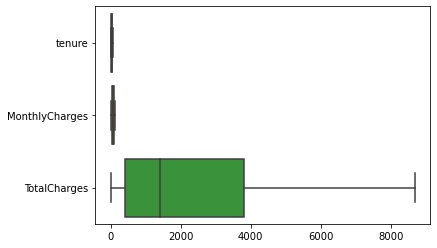

In [5]:
sns.boxplot(data=df, orient="h",whis=1.5)

Skewed results but the boxplot is not indicating any outliers.

In [6]:
df = pd.read_csv('data\churn_data.csv', index_col='customerID')

### Missing Values?

Dropped the missing values

In [7]:
df.isna().sum()

tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [8]:
df.dropna(inplace=True)

### Looking for outliers again (Advanced)

In [9]:
numeric_df = df.select_dtypes(exclude=['object'])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_df)

In [11]:
from pyod.models.knn import KNN

od = KNN(contamination=0.01)
od.fit(scaled_numeric)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [12]:
outliers = od.predict(scaled_numeric)
outliers

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
outliers.sum()

49

In [14]:
dfO = df[outliers.astype('bool')]

In [15]:
df = pd.concat([df, dfO])

In [16]:
df = df.drop_duplicates(keep=False)

I removed the outliers.

## Data Understanding (Week 2, Phase 2)

All further data has missing values removed

In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,6793.000000,6793.000000,6793.000000
mean,33.231709,65.309348,2341.866061
std,24.335525,29.944159,2268.883532
min,1.000000,18.250000,18.800000
25%,10.000000,39.100000,454.000000
50%,30.000000,70.800000,1445.200000
75%,56.000000,90.100000,3882.300000
max,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='TotalCharges', ylabel='Frequency'>

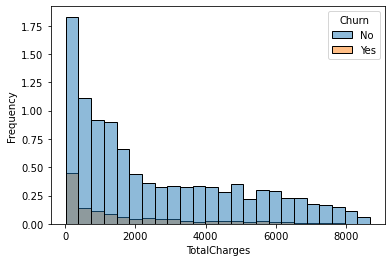

In [18]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Frequency'>

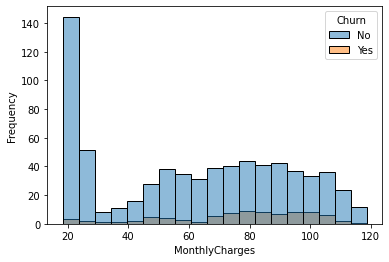

In [19]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='tenure', ylabel='Frequency'>

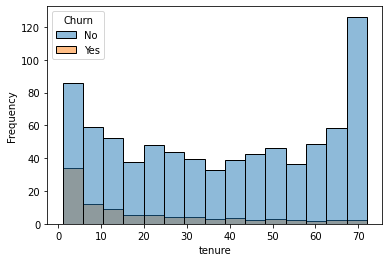

In [20]:
sns.histplot(data=df, x='tenure', hue='Churn', stat='frequency')

## Data Preparation (Week 2, Phase 2)

### Converting categoral columns to numerical values

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [22]:
df = pd.concat([df.drop('PhoneService', axis=1), pd.get_dummies(df['PhoneService'],prefix='PhoneService', drop_first=True)],axis=1)

In [23]:
df = pd.concat([df.drop('Contract', axis=1), pd.get_dummies(df['Contract'])],axis=1)

In [24]:
df = pd.concat([df.drop('PaymentMethod', axis=1), pd.get_dummies(df['PaymentMethod'])],axis=1)

In [25]:
df

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,0,1,0
5575-GNVDE,34,56.95,1889.50,0,1,0,1,0,0,0,0,1
3668-QPYBK,2,53.85,108.15,1,1,1,0,0,0,0,0,1
7795-CFOCW,45,42.30,1840.75,0,0,0,1,0,1,0,0,0
9237-HQITU,2,70.70,151.65,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,84.80,1990.50,0,1,0,1,0,0,0,0,1
2234-XADUH,72,103.20,7362.90,0,1,0,1,0,0,1,0,0
4801-JZAZL,11,29.60,346.45,0,0,1,0,0,0,0,1,0


report = ProfileReport(df)
report.to_file('churn_prepped_eda.html')

### Assumption 1: tenure and monthly charges are functions of the total charges of a customer.

#### Converting Functions (DV) and IV to Logarithmic Values

In [26]:
df_log = df.copy()
df_log['TotalCharges'] = np.log(df_log['TotalCharges'])
df_log['MonthlyCharges'] = np.log(df_log['MonthlyCharges'])
df_log['tenure'] = np.log(df_log['tenure'])

#### Creating new values from ratios

Let's create a ratio of TotalCharges to MonthlyCharges and TotalCharges to Tenure.

In [27]:
df['TotalCharges_MonthlyCharges_ratio'] = df['TotalCharges'] / df['MonthlyCharges']
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['MonthlyCharges_tenure_Ratio'] = df['MonthlyCharges'] / df['tenure']

## Data Understanding (Week 2, Phase 3)

### Assumption 1 Confirmed by Correlations to Logaritmic Values

#### Redistribution

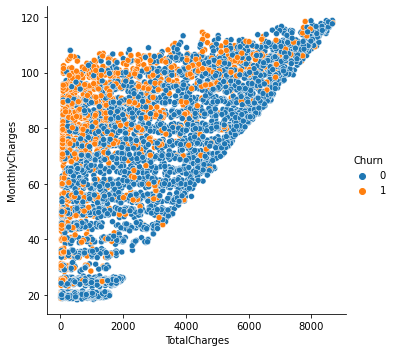

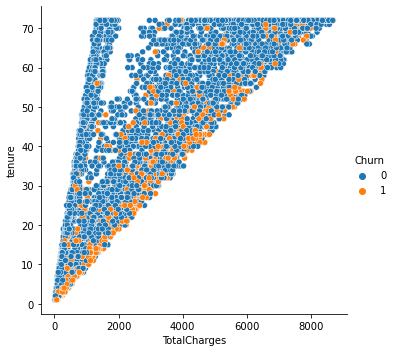

In [28]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.relplot(data=df, x='TotalCharges', y='tenure', hue='Churn')

<AxesSubplot:ylabel='Frequency'>

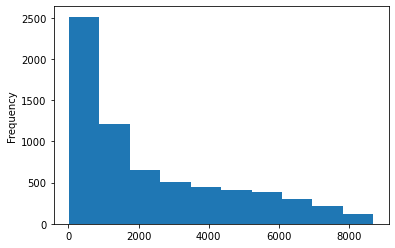

In [29]:
df['TotalCharges'].plot.hist()

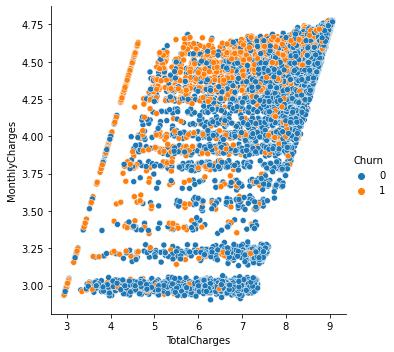

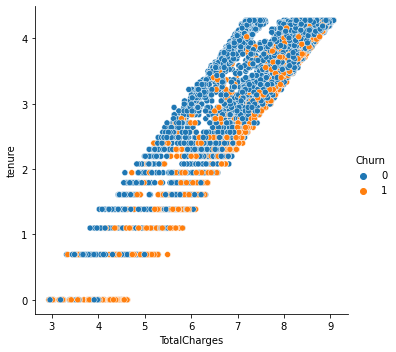

In [30]:
sns.relplot(data=df_log, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.relplot(data=df_log, x='TotalCharges', y='tenure', hue='Churn')

<AxesSubplot:ylabel='Frequency'>

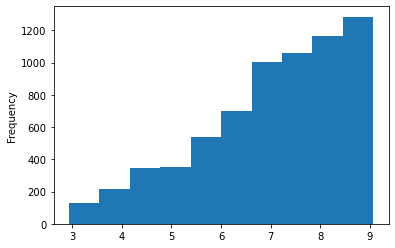

In [31]:
df_log['TotalCharges'].plot.hist()

#### Assumption 1.a: Customers with long-term contracts with higher total charges tend to leave

<AxesSubplot:xlabel='Month-to-month', ylabel='TotalCharges'>

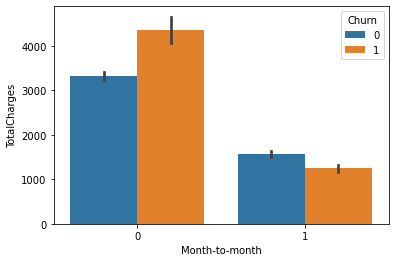

In [32]:
sns.barplot(data=df, x='Month-to-month', y='TotalCharges', hue='Churn')

<AxesSubplot:xlabel='Month-to-month', ylabel='TotalCharges'>

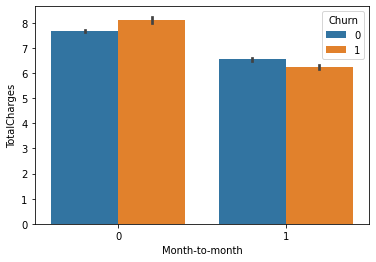

In [33]:
sns.barplot(data=df_log, x='Month-to-month', y='TotalCharges', hue='Churn')

We also found last week that customers with long-term contracts who paid greater than 60 dollars a month tended to stay in contrast to customers in month-to-month contracts who are more likely to churn.

#### Assumption 1.b: Customers with greater monthly charges only keep their accounts because they are in a contract

<AxesSubplot:xlabel='Month-to-month', ylabel='MonthlyCharges'>

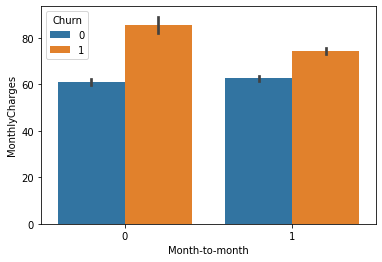

In [34]:
sns.barplot(data=df, x='Month-to-month', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='Month-to-month', ylabel='MonthlyCharges'>

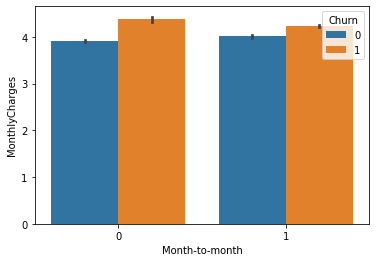

In [35]:
sns.barplot(data=df_log, x='Month-to-month', y='MonthlyCharges', hue='Churn')

### Assumption 1 Confirmed with Ratios

#### Redistribution

In [36]:
report = ProfileReport(df)
report.to_file('churn_ratio_eda.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

As expected TotalCharges divided by tenure would give me the over all average monthly charges and there is a strong positive correlation between the created variable and monthly charges. Also Total charges divided by the monthly charges would give me the amount of time they are with the company, also confirmed by the correlation between TotalCharges_MonthlyCharges_ratio and the tenure.

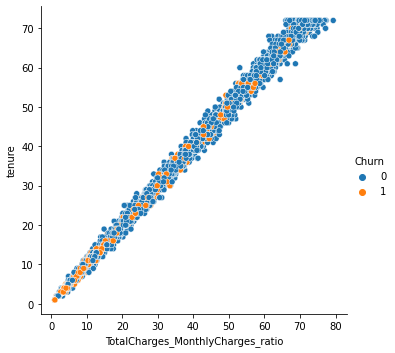

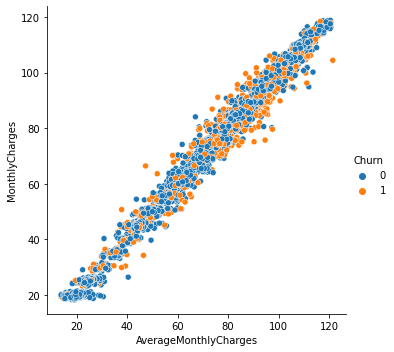

In [37]:
sns.relplot(data=df, x='TotalCharges_MonthlyCharges_ratio', y='tenure', hue='Churn')
sns.relplot(data=df, x='AverageMonthlyCharges', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='TotalCharges_MonthlyCharges_ratio', ylabel='Frequency'>

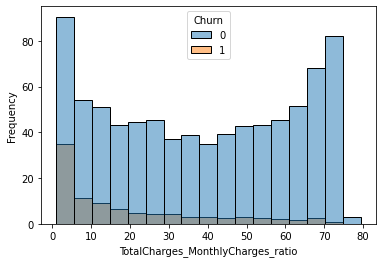

In [38]:
sns.histplot(data=df, x='TotalCharges_MonthlyCharges_ratio', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='AverageMonthlyCharges', ylabel='Frequency'>

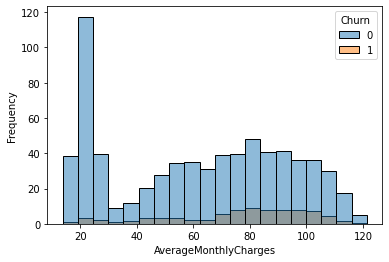

In [39]:
sns.histplot(data=df, x='AverageMonthlyCharges', hue='Churn', stat='frequency')

#### Assumption 1.a: Customers with long-term contracts with higher total charges tend to leave

<AxesSubplot:xlabel='Month-to-month', ylabel='AverageMonthlyCharges'>

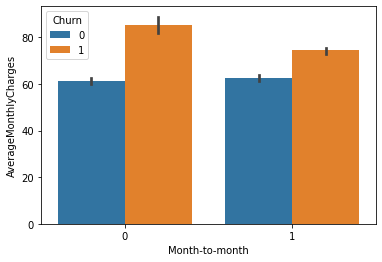

In [40]:
sns.barplot(data=df, x='Month-to-month', y='AverageMonthlyCharges', hue='Churn')

This relationship is the comparing the ratio of TotalCharges to Tenure. If the Total Charges reach a ratio of $60:1 month tenure the customer will churn no matter the contract type. Those in long-term contracts are still bound to their contract of one to two years so their ratios tend to reach greater maximums before churning.

#### Assumption 1.b: Customers with greater monthly charges only keep their accounts because they are in a contract

The ratios Contract:tenure is almost equal to the ratio Contract:TotalCharges_MonthlyCharges_ratio showing me that the coeffcients are almost 1 to 1 and also indicate both correlations are slightly positive. Someone with a long-term contract will definitely accrue larger total charges and a longer tenure compared to someone in a month-to-month contract that can churn after every month. There is almost no correlation between contracts and monthly charges. This may be due to the lack of unique values available to the contracts (can only be 0, 1, or 2). The value counts of customers in each contract would give me a more accurate relationship of the two variables.

In [41]:
df.corr(method='pearson')

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,TotalCharges_MonthlyCharges_ratio,AverageMonthlyCharges,MonthlyCharges_tenure_Ratio
tenure,1.000000,0.235241,0.822276,-0.341031,0.025148,-0.639801,0.187280,0.561471,0.233935,0.221218,-0.210922,-0.217397,0.998890,0.234418,-0.520729
MonthlyCharges,0.235241,1.000000,0.651674,0.204150,0.250512,0.078691,-0.005469,-0.085749,0.037041,0.022070,0.265361,-0.361324,0.234873,0.996110,0.066355
TotalCharges,0.822276,0.651674,1.000000,-0.183648,0.121215,-0.433141,0.158070,0.350384,0.177393,0.173460,-0.057535,-0.287075,0.822561,0.651322,-0.377120
Churn,-0.341031,0.204150,-0.183648,1.000000,0.003624,0.397253,-0.169092,-0.298432,-0.110184,-0.125766,0.295616,-0.099285,-0.340693,0.203493,0.355828
PhoneService_Yes,0.025148,0.250512,0.121215,0.003624,1.000000,-0.011808,0.006680,0.007299,0.013130,0.000579,-0.001345,-0.012283,0.025127,0.250257,0.052096
Month-to-month,-0.639801,0.078691,-0.433141,0.397253,-0.011808,1.000000,-0.563971,-0.619795,-0.171636,-0.194016,0.333469,-0.012052,-0.639460,0.077690,0.374450
One year,0.187280,-0.005469,0.158070,-0.169092,0.006680,-0.563971,1.000000,-0.298507,0.051088,0.058802,-0.106518,0.010792,0.186710,-0.005117,-0.195947
Two year,0.561471,-0.085749,0.350384,-0.298432,0.007299,-0.619795,-0.298507,1.000000,0.149817,0.168352,-0.284180,0.003673,0.561620,-0.084926,-0.246557
Bank transfer (automatic),0.233935,0.037041,0.177393,-0.110184,0.013130,-0.171636,0.051088,0.149817,1.000000,-0.287275,-0.381177,-0.286416,0.232760,0.036405,-0.142462
Credit card (automatic),0.221218,0.022070,0.173460,-0.125766,0.000579,-0.194016,0.058802,0.168352,-0.287275,1.000000,-0.376992,-0.283271,0.221699,0.021895,-0.139181


## Save Dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6793 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tenure                             6793 non-null   int64  
 1   MonthlyCharges                     6793 non-null   float64
 2   TotalCharges                       6793 non-null   float64
 3   Churn                              6793 non-null   int32  
 4   PhoneService_Yes                   6793 non-null   uint8  
 5   Month-to-month                     6793 non-null   uint8  
 6   One year                           6793 non-null   uint8  
 7   Two year                           6793 non-null   uint8  
 8   Bank transfer (automatic)          6793 non-null   uint8  
 9   Credit card (automatic)            6793 non-null   uint8  
 10  Electronic check                   6793 non-null   uint8  
 11  Mailed check                       6793 non-nu

In [43]:
df.to_csv('prepped_churn_data.csv')
df_log.to_csv('prepped_logchurn_data.csv')

## Summary

Write your summary of the process and results here.

**Process Summary**

I began with a reviewing the dataframe to gain insight into the business and how to tackle the question being asked. For a deeper understanding of the data and the relationships I produced an EDA. I checked for any outliers using boxplots and no data points fell outside the whiskers so there were no outliers to deal with. Next, I scanned the data for any missing values and found 11 missing Total Charges. I contemplated many ways of filling the data including interpolation _which I found most interesting_ . Without having further knowledge of how the command interacts with the data I decided to just remove all rows with missing values. I didn't like leaving the Outliers where they were so I used the advanced KNN technique to find some. I removed 49 outliers. I again reviewed the data with the missing values and outliers removed. Next, I converted the categorical columns _(Churn, Contracts, PaymentMethods, PhoneService)_ into numerical values. I created an assumption that _tenure_ and _monthlycharges_ are functions of _totalcharges_ and converted all variables into logarithmic data to model in linear regression analyses. I created new ratio variables based on this assumption as well. I displayed the redistribution of the models under each conversion and confirmed whether or not the data was consistent with my assumptions. I saved the prepped dataframe all the ratios and logarithms for later use.

**Summary of Results**

I did find that there was a positive linear relationship between the totalcharges and tenure as well as the totalcharges and monthlycharges. I found a strong relationship between the Total and Monthly charges and a person's decision to churn. When the total charges of a customer's account reaches the $60 a month average over their tenure they will churn when their contract ends.

# NOTE TO SELF!

**Holy Mama!** I need to look into the [phik documentation](https://phik.readthedocs.io/en/latest/) more.

In [44]:
df.significance_matrix()

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'PhoneService_Yes', 'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'TotalCharges_MonthlyCharges_ratio', 'AverageMonthlyCharges', 'MonthlyCharges_tenure_Ratio']


,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,TotalCharges_MonthlyCharges_ratio,AverageMonthlyCharges,MonthlyCharges_tenure_Ratio
tenure,171.071093,31.050966,98.883192,28.592149,0.691689,55.918415,25.070764,48.429263,18.662891,17.634140,17.251978,17.601019,152.616921,27.338804,60.641077
MonthlyCharges,31.050966,169.238673,70.450902,23.490155,45.517173,27.491525,9.537314,24.956432,6.434552,3.207746,26.250959,29.342271,31.323169,146.405068,32.114751
TotalCharges,98.883192,70.450902,160.252188,15.757776,14.972271,37.680438,15.142944,31.334390,14.747826,14.118631,5.405120,25.545949,99.584171,70.594526,45.920699
Churn,28.592149,23.490155,15.757776,87.681741,-0.847373,34.466236,14.765295,28.233039,9.305023,10.701477,23.819458,8.342638,28.633176,21.299558,27.582051
PhoneService_Yes,0.691689,45.517173,14.972271,-0.847373,65.288354,0.390655,-0.311610,-0.102658,0.577474,-2.759418,-1.652602,0.556011,0.575488,41.876349,6.248669
Month-to-month,55.918415,27.491525,37.680438,34.466236,0.390655,96.614661,51.941435,56.964346,14.080892,15.948461,28.062898,0.439939,55.877599,23.806265,36.465720
One year,25.070764,9.537314,15.142944,14.765295,-0.311610,51.941435,83.711482,30.609770,3.948308,4.655826,8.893963,0.394889,25.679346,9.923477,21.324108
Two year,48.429263,24.956432,31.334390,28.233039,-0.102658,56.964346,30.609770,86.924523,11.909647,13.361951,25.163553,-0.758926,48.885897,21.453250,24.351288
Bank transfer (automatic),18.662891,6.434552,14.747826,9.305023,0.577474,14.080892,3.948308,11.909647,84.888702,29.570663,37.789008,29.479745,18.424379,4.875556,12.554095
Credit card (automatic),17.634140,3.207746,14.118631,10.701477,-2.759418,15.948461,4.655826,13.361951,29.570663,84.498477,37.615340,29.187331,17.562639,3.227605,11.418626


In [45]:
cols = ['PhoneService_Yes','MonthlyCharges']
df[cols].hist2d()

interval columns not set, guessing: ['PhoneService_Yes', 'MonthlyCharges']


MonthlyCharges,1,2,3,4,5,6,7,8,9,10
PhoneService_Yes,,,,,,,,,,
1,76.0,177.0,178.0,150.0,72.0,0.0,0.0,0.0,0.0,0.0
10,1434.0,0.0,158.0,476.0,400.0,834.0,945.0,865.0,756.0,272.0


In [46]:
df[cols].outlier_significance_matrix()

interval columns not set, guessing: ['PhoneService_Yes', 'MonthlyCharges']


,18.2_28.3,28.3_38.3,38.3_48.4,48.4_58.4,58.4_68.5,68.5_78.5,78.5_88.6,88.6_98.6,98.6_108.7,108.7_118.8
-0.0_0.1,-7.277986,30.233108,21.380044,11.263757,4.033839,-13.208108,-14.144784,-13.474465,-12.519391,-7.207634
0.9_1.0,7.551288,-27.274342,-8.209536,-8.209536,-4.055075,13.327652,14.400595,13.631199,12.548121,6.717748


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

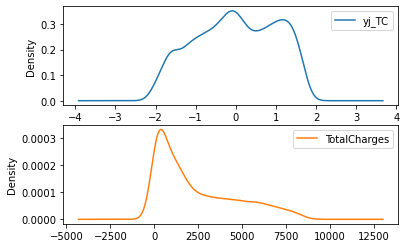

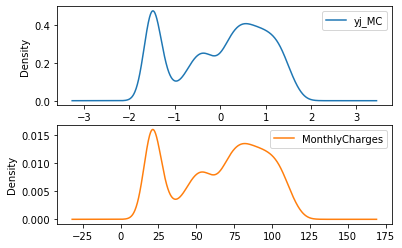

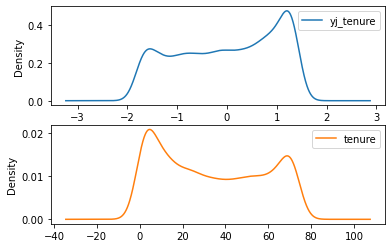

In [47]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df['yj_TC'] = pt.fit_transform(df[['TotalCharges']])
df[['yj_TC', 'TotalCharges']].plot.density(subplots=True, sharex=False)
df['yj_MC'] = pt.fit_transform(df[['MonthlyCharges']])
df[['yj_MC', 'MonthlyCharges']].plot.density(subplots=True, sharex=False)
df['yj_tenure'] = pt.fit_transform(df[['tenure']])
df[['yj_tenure', 'tenure']].plot.density(subplots=True, sharex=False)